In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import cv2

In [9]:

path = os.listdir('C:\\Users\\DELL\\Downloads\\Documents\\image_class\\Face Mask Dataset\\Train')
classes = {'WithMask':0, 'WithoutMask':1}

Prepare/collect data

In [10]:

X = []
Y = []
for cls in classes:
    print(f'loading... category : {cls}')
    pth = 'C:\\Users\\DELL\\Downloads\\Documents\\image_class\\Face Mask Dataset\\Train\\'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])
X = np.array(X)
Y = np.array(Y)
X_updated = X.reshape(len(X), -1)        
print("ready ")

loading... category : WithMask
loading... category : WithoutMask
ready 


#Visualize data

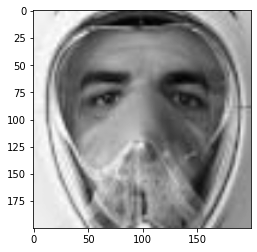

In [11]:
plt.imshow(X[0], cmap='gray') 

Split Data

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.20) #Split Data
print('Splitted Successfully')

Splitted Successfully


Feature Scaling

In [13]:
print(xtrain.max(), xtrain.min())   
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


Feature Selection: PCA

In [8]:
from sklearn.decomposition import PCA 

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
pca_train = sc.fit_transform(xtrain)
pca_test = sc.transform(xtest)
print(xtrain.shape, xtest.shape)

(8000, 40000) (2000, 40000)


#Train Model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC                      
#Train Model

In [16]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

Evaluation

In [17]:
from sklearn.metrics import confusion_matrix 


In [18]:
from sklearn.metrics import accuracy_score

In [19]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [20]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 0.927375
Testing Score: 0.872


In [23]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))


Training Score: 0.976625
Testing Score: 0.947


#Prediction

In [24]:
pred = sv.predict(xtest)

In [ ]:
misclassified=np.where(ytest!=pred)
misclassified

(array([   3,   11,   24,   37,   60,   78,   95,  109,  113,  127,  160,
         173,  174,  181,  187,  208,  267,  273,  295,  328,  332,  387,
         388,  428,  432,  458,  469,  484,  586,  595,  600,  605,  617,
         663,  671,  715,  721,  724,  737,  777,  803,  805,  812,  837,
         862,  872,  878,  887,  894,  900,  937,  953,  964,  968, 1005,
        1010, 1020, 1054, 1067, 1081, 1114, 1119, 1144, 1148, 1153, 1172,
        1193, 1286, 1291, 1313, 1354, 1364, 1371, 1394, 1429, 1436, 1442,
        1471, 1513, 1534, 1542, 1577, 1589, 1602, 1608, 1632, 1641, 1645,
        1664, 1674, 1680, 1714, 1735, 1743, 1751, 1774, 1806, 1828, 1846,
        1870, 1904, 1907, 1945, 1952, 1962, 1988], dtype=int64),)

TEST MODEL

In [ ]:
dec = {0:'WithMask', 1:'WithoutMask'}

WithMask

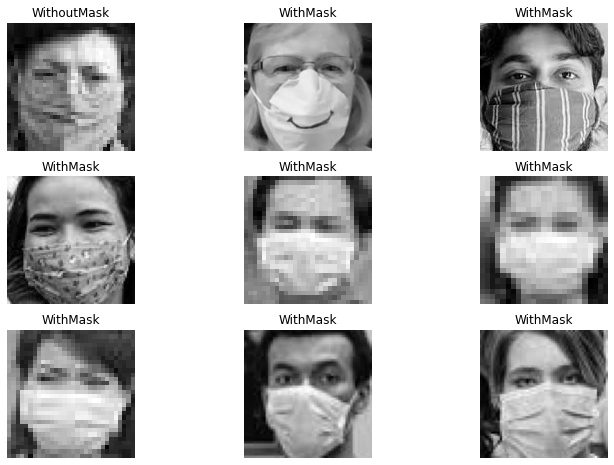

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('C:\\Users\\DELL\\Downloads\\Documents\\image_class\\Face Mask Dataset\\Test\\')
c=1
for i in os.listdir('\\Users\\DELL\\Downloads\\Documents\\image_class\\Face Mask Dataset\\Test\\WithMask')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('\\Users\\DELL\\Downloads\\Documents\\image_class\\Face Mask Dataset\\Test\\WithMask\\'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

WithoutMask

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('C:\\Users\\DELL\\Downloads\\Documents\\image_class\\Face Mask Dataset\\Test\\')
c=1
for i in os.listdir('\\Users\\DELL\\Downloads\\Documents\\image_class\\Face Mask Dataset\\Test\\WithoutMask')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('\\Users\\DELL\\Downloads\\Documents\\image_class\\Face Mask Dataset\\Test\\WithoutMask\\'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1